In [1]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    bfs_order = []

    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            bfs_order.append(vertex)
            queue.extend(graph[vertex] - visited)

    return bfs_order
graph = {
    '1': set(['2', '3']),
    '2': set(['1', '4', '5']),
    '3': set(['1']),
    '4': set(['2']),
    '5': set(['2', '6']),
    '6': set(['5'])
}


bfs_result = bfs(graph, '1')
print(bfs_result)


['1', '2', '3', '4', '5', '6']


In [2]:
# New graph representation
graph = {
    '1': set(['2', '3']),
    '2': set(['1', '4', '5']),
    '3': set(['1']),
    '4': set(['2']),
    '5': set(['2', '6']),
    '6': set(['5'])
}

visited = []
queue = []

def bfs(visited, graph, node):
    visited.append(node)
    queue.append(node)

    while queue:
        m = queue.pop(0)
        print(m, end=" ")

        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

print("Following is the Breadth-First Search:")
bfs(visited, graph, '1')


Following is the Breadth-First Search:
1 2 3 4 5 6 

In [3]:
# New graph representation
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

visited = set()

def dfs(visited, graph, node):
    if node not in visited:
        print(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

print("Following is the Depth-First Search:")
dfs(visited, graph, 'A')


Following is the Depth-First Search:
A
B
D
E
F
C


Path found: ['A', 'C', 'F', 'H', 'J']


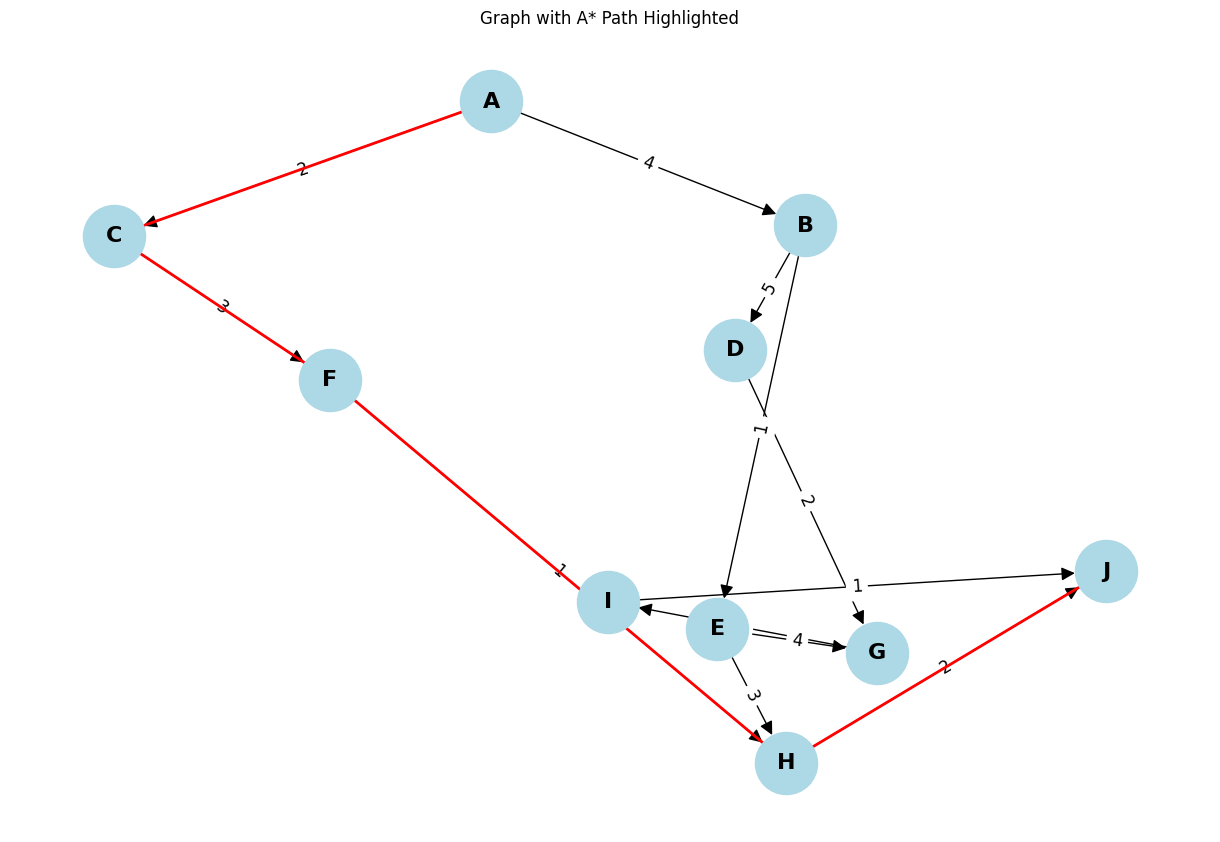

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# New graph structure with different nodes and weights
Graph_nodes = {
    'A': [('B', 4), ('C', 2)],
    'B': [('D', 5), ('E', 1)],
    'C': [('F', 3)],
    'D': [('G', 2)],
    'E': [('G', 4), ('H', 3)],
    'F': [('H', 1)],
    'G': [('I', 1)],
    'H': [('J', 2)],
    'I': [('J', 1)],
    'J': []
}

def h(n):
    H_dist = {
        'A': 7,
        'B': 6,
        'C': 4,
        'D': 3,
        'E': 2,
        'F': 4,
        'G': 1,
        'H': 2,
        'I': 1,
        'J': 0
    }
    return H_dist[n]

def get_neighbors(v):
    return Graph_nodes.get(v, [])

def aStarAlgo(start_node, stop_node):
    open_set = set([start_node])
    closed_set = set()
    g = {}
    parents = {}
    g[start_node] = 0
    parents[start_node] = start_node

    while open_set:
        n = None
        for v in open_set:
            if n is None or g[v] + h(v) < g[n] + h(n):
                n = v

        if n == stop_node:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(start_node)
            path.reverse()

            print('Path found: {}'.format(path))
            return path

        if not Graph_nodes.get(n):
            continue

        for (m, weight) in get_neighbors(n):
            if m not in open_set and m not in closed_set:
                open_set.add(m)
                parents[m] = n
                g[m] = g[n] + weight
            else:
                if g[m] > g[n] + weight:
                    g[m] = g[n] + weight
                    parents[m] = n
                    if m in closed_set:
                        closed_set.remove(m)
                        open_set.add(m)

        if n is None:
            print('Path does not exist!')
            return None

        open_set.remove(n)
        closed_set.add(n)

    print('Path does not exist!')
    return None

# Run A* algorithm from 'A' to 'J'
path = aStarAlgo('A', 'J')

def draw_graph():
    G = nx.DiGraph()

    for node, edges in Graph_nodes.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue',
            font_size=16, font_weight='bold', arrows=True, arrowsize=20)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red',
                               width=2)

    plt.title('Graph with A* Path Highlighted')
    plt.show()

draw_graph()


In [8]:
from collections import deque

def bfs(graph, start, goal):
    visited = set()
    queue = deque([[start]])

    if start == goal:
        return [start]

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node not in visited:
            neighbors = graph[node]
            for neighbor in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

                if neighbor == goal:
                    return new_path

            visited.add(node)

    return None

# New graph representation
graph_bfs = {
    '1': ['2', '3', '4'],
    '2': ['1', '5', '6'],
    '3': ['1'],
    '4': ['1', '7'],
    '5': ['2'],
    '6': ['2', '8'],
    '7': ['4'],
    '8': ['6']
}

print("BFS path:", bfs(graph_bfs, '1', '8'))  # Start from '1' and find path to '8'


BFS path: ['1', '2', '6', '8']


In [9]:
from queue import PriorityQueue

def a_star(graph, start, goal, h):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0

    while not open_set.empty():
        _, current = open_set.get()

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for neighbor, cost in graph[current].items():
            tentative_g_score = g_score[current] + cost

            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + h[neighbor]
                open_set.put((f_score, neighbor))

    return None

# New graph representation
graph_a_star = {
    '1': {'2': 1, '3': 4},
    '2': {'1': 1, '4': 2, '5': 5},
    '3': {'1': 4, '6': 3},
    '4': {'2': 2, '7': 1},
    '5': {'2': 5, '7': 2, '8': 3},
    '6': {'3': 3, '8': 1},
    '7': {'4': 1, '5': 2},
    '8': {'5': 3, '6': 1}
}

# New heuristic values
heuristics_a_star = {
    '1': 7,
    '2': 6,
    '3': 2,
    '4': 4,
    '5': 3,
    '6': 1,
    '7': 0,
    '8': 2
}

print("A* path:", a_star(graph_a_star, '1', '7', heuristics_a_star))


A* path: ['1', '2', '4', '7']


In [10]:
def minimax(depth, node_index, maximizing_player, values, alpha, beta):
    if depth == 3:
        return values[node_index]

    if maximizing_player:
        best = float('-inf')
        for i in range(2):
            val = minimax(depth + 1, node_index * 2 + i, False, values, alpha, beta)
            best = max(best, val)
            alpha = max(alpha, best)

            if beta <= alpha:
                break
        return best
    else:
        best = float('inf')
        for i in range(2):
            val = minimax(depth + 1, node_index * 2 + i, True, values, alpha, beta)
            best = min(best, val)
            beta = min(beta, best)

            if beta <= alpha:
                break
        return best

# New values for the leaf nodes
values_minimax = [30, 20, 50, 40, 10, 60, 5, 70]
print("Optimal value:", minimax(0, 0, True, values_minimax, float('-inf'), float('inf')))


Optimal value: 60


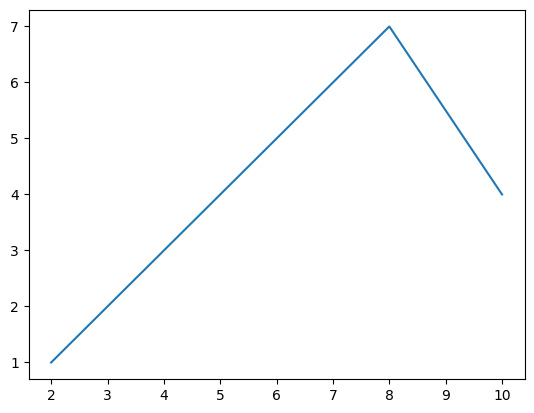

In [14]:
#basic plot

from matplotlib import pyplot as plt

 #Plotting to our canvas

plt.plot([2,4,6,8,10],[1,3,5,7,4])

 #Showing what we plotted

plt.show()

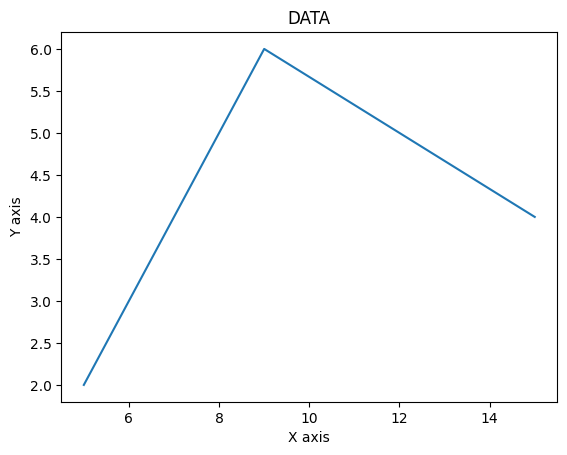

In [15]:
#PLOT WITH A TITLE

x = [5,9,15]
y = [2,6,4]
plt.plot(x,y)
plt.title('DATA')
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.show()

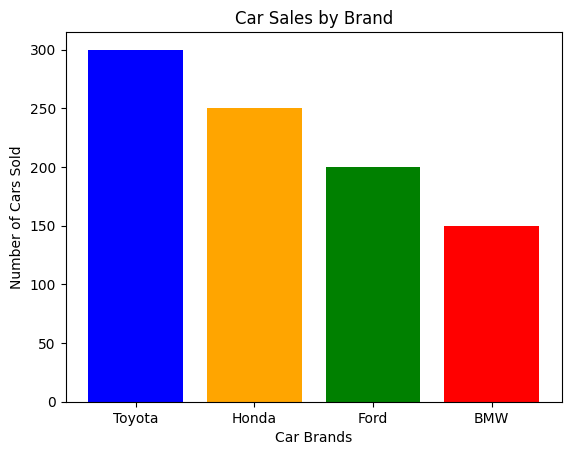

In [16]:
#BAR GRAPH

import matplotlib.pyplot as plt

car_brands = ['Toyota', 'Honda', 'Ford', 'BMW']
sales = [300, 250, 200, 150]

plt.bar(car_brands, sales, color=['blue', 'orange', 'green', 'red'])

plt.xlabel('Car Brands')
plt.ylabel('Number of Cars Sold')
plt.title('Car Sales by Brand')

plt.show()

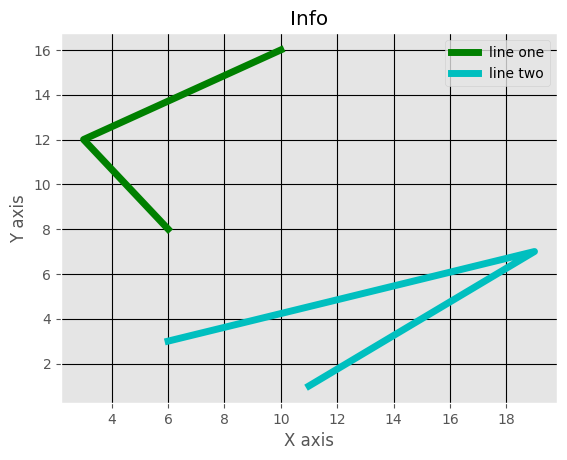

In [18]:

from matplotlib import pyplot as plt
from matplotlib import style

style.use('ggplot')
x = [6,3,10]
y = [8,12,16]
x2 = [6,19,11]
y2 = [3,7,1]
plt.plot(x,y,'g',label='line one', linewidth=5)
plt.plot(x2,y2,'c',label='line two',linewidth=5)
plt.title('Info')
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.legend()
plt.grid(True,color='k')
plt.show()

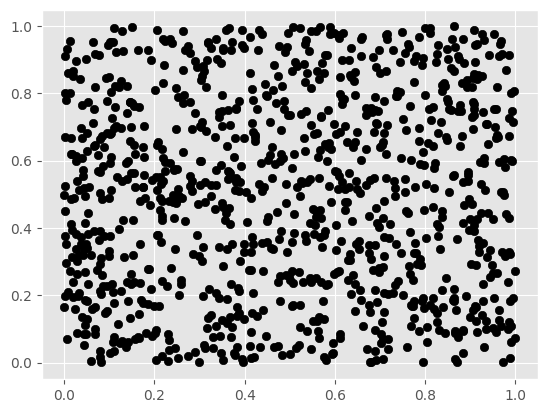

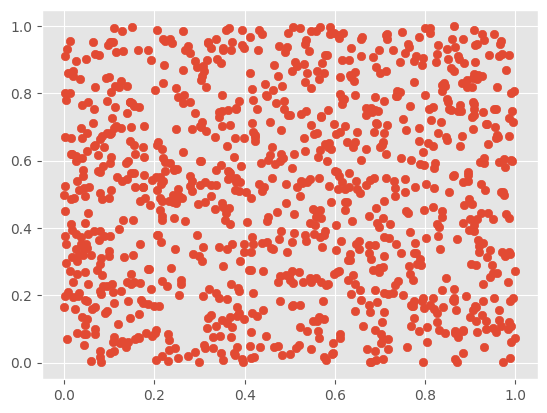

In [22]:
import numpy as np
x = np.random.random(1000)
y = np.random.random(1000)
plt.scatter(x,y,color='black')
plt.show()
plt.scatter(x, y)

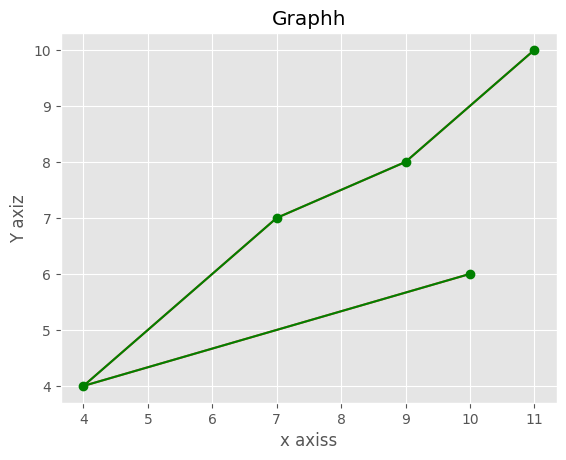

In [24]:
x= [10,4,7,9,11]
y= [6,4,7,8,10]

plt.plot(x,y)

plt.title('Graphh')
plt.ylabel('Y axiz')
plt.xlabel('x axiss')
plt.plot(x, y, '-o', color = 'green')

plt.show()

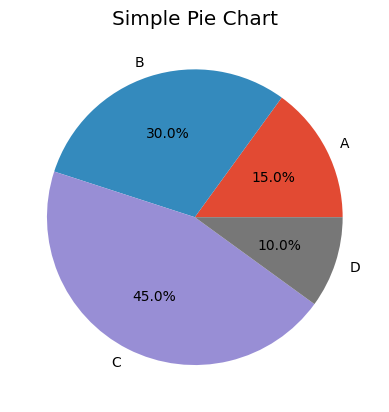

In [25]:
#PIE CHART

import matplotlib.pyplot as plt

labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Simple Pie Chart')

plt.show()

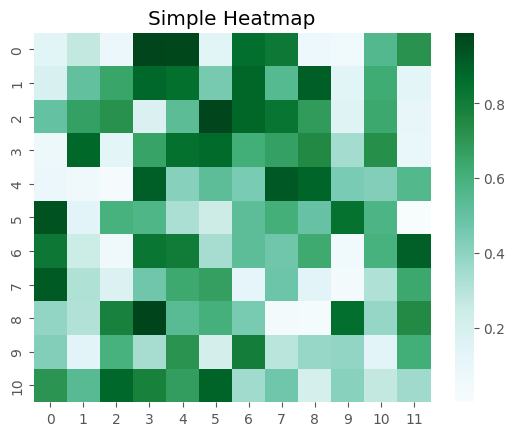

In [26]:
#HEAT MAP

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = np.random.rand(11, 12)

sns.heatmap(data, cmap='BuGn')

plt.title('Simple Heatmap')
plt.show()

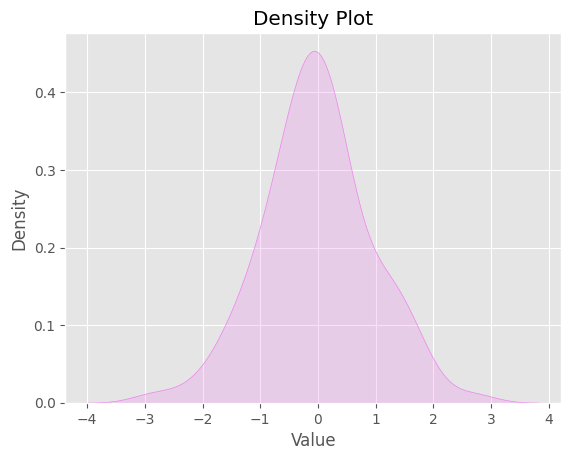

In [27]:
#DENSITY PLOT

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = np.random.normal(loc=0, scale=1, size=100)

sns.kdeplot(data, fill=True, color='violet')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot')

plt.show()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


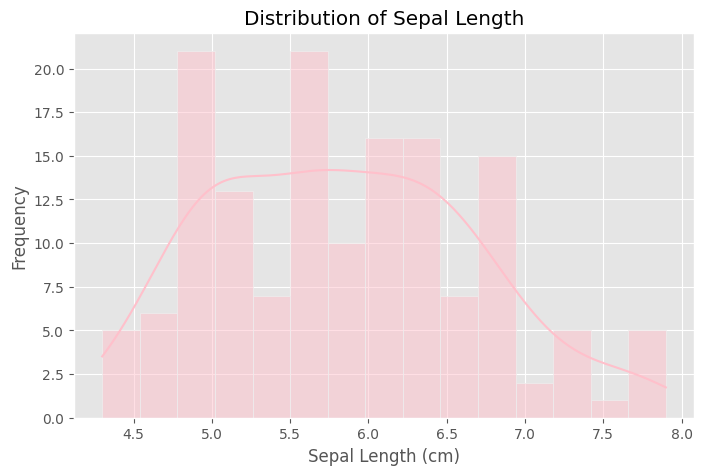

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset('iris')

print(data.head())

print("\nMissing values in each column:")
print(data.isnull().sum())

plt.figure(figsize=(8, 5))
sns.histplot(data['sepal_length'], bins=15, kde=True, color='pink')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()